In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB

from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import classification_report, accuracy_score
import time


In [41]:
df = pd.read_csv('data/mushrooms.csv')

df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [42]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [43]:
df = df.drop('veil-type', axis=1)
df = df.drop('stalk-root', axis=1)



In [44]:
encoder = OrdinalEncoder()

X = df.drop('class', axis=1)
y = df['class']

X = encoder.fit_transform(X)
y = y_encoded = y.map({'e': 0, 'p': 1}).values



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train.shape


(6499,)

## Sklearn

In [45]:
start_time = time.time()
# Initialize the classifier
nb_classifier = CategoricalNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

nb_classifier.predict(X_test)

end_time = time.time()

sklearn_time = end_time - start_time

print(f"Sklearn time: {sklearn_time}")
print(classification_report(y_test, nb_classifier.predict(X_test)))


Sklearn time: 0.014163970947265625
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       843
           1       0.99      0.92      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [46]:
from naive_bayes import CategoricalNB as CustomCategoricalNB

start_time = time.time() 

custom = CustomCategoricalNB()

custom.fit(X_train, y_train)

custom.predict(X_test)

end_time = time.time()

custom_time = end_time - start_time

print(f"Custom time: {custom_time}")
print(classification_report(y_test, custom.predict(X_test)))




Custom time: 0.18833494186401367
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       843
           1       0.99      0.92      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



## Cross validation

In [49]:
def cross_validation(model, X, y, num_folds=5):
    scores = []
    for _ in range(num_folds):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))

    return scores



In [51]:
sklearn = CategoricalNB()
custom = CustomCategoricalNB()

sklearn_accuracy = np.mean(cross_validation(sklearn, X, y,10))
custom_accuracy = np.mean(cross_validation(custom, X, y,10))

print(f"Sklearn accuracy: {sklearn_accuracy}")
print(f"Custom accuracy: {custom_accuracy}")




Sklearn accuracy: 0.9593846153846155
Custom accuracy: 0.9593846153846155


## Comparison

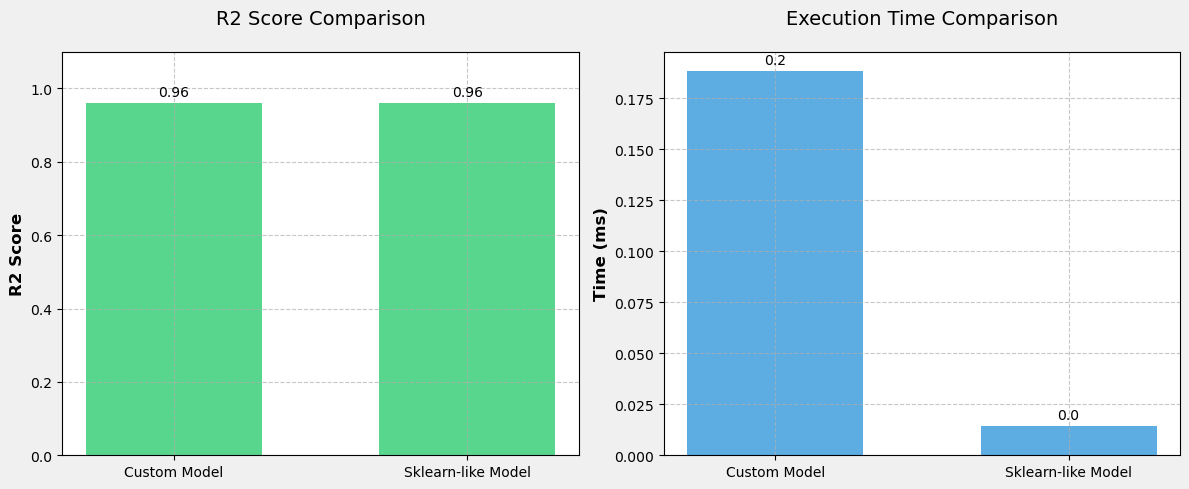

In [52]:
# Setup for plotting with modern style
plt.style.use('default')

# Data preparation
model_names = ['Custom Model', 'Sklearn-like Model']
r2_scores_plot = [custom_accuracy, sklearn_accuracy]
time_taken_plot = [custom_time, sklearn_time]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.patch.set_facecolor('#f0f0f0')

# Set positions for bars
x = np.arange(len(model_names))
width = 0.6

# Create R2 Score bars with modern styling
bars1 = ax1.bar(x, r2_scores_plot, width, color='#2ecc71', alpha=0.8)
ax1.set_ylabel('R2 Score', fontsize=12, fontweight='bold')
ax1.set_title('R2 Score Comparison', fontsize=14, pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, fontsize=10)
ax1.set_ylim(0, 1.1)
ax1.grid(True, linestyle='--', alpha=0.7)

# Create Time bars with modern styling
bars2 = ax2.bar(x, time_taken_plot, width, color='#3498db', alpha=0.8)
ax2.set_ylabel('Time (ms)', fontsize=12, fontweight='bold')
ax2.set_title('Execution Time Comparison', fontsize=14, pad=20)
ax2.set_xticks(x)
ax2.set_xticklabels(model_names, fontsize=10)
ax2.grid(True, linestyle='--', alpha=0.7)

# Add value labels with modern styling
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()